Problem statement:-

Prepare a EDA-Visualization and interpretation of graphs
for the HR department about the Employee Attrition and 
give the insights and suggestions about the factors associated with the 
attrition, so that HR can take preventive measure to reduce Attrition.

Please note:- We are not making any prediction or model building . only EDA is required.

In [1]:
# required tools Matplotlib and seaborn.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [253]:
#Read data
data=pd.read_csv("HR_Employee_Attrition.csv")

# Understading the data

In [9]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

####  As per observation above ,there are 35 columns and 1470 rows.
#### There are no missing values  present in data.

In [392]:
#getting numeric columns
num_cols=data.select_dtypes(include=['float','int']).columns

In [393]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
#Getting category columnns
cat_cols_list=data.select_dtypes(include=['object']).columns

In [394]:
data[cat_cols_list].describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


# Transforming data for EDA

In [395]:
#Copy the original data
df=data.copy()

In [579]:
#Creating Numeric Attrition column for aggretaions
df["Attrition_numeric"]=df["Attrition"].map({"Yes":1,"No":0})

In [398]:
#dropping insignificant columns

df=df.drop(['Over18','StandardHours','EmployeeCount','EmployeeNumber'],axis=1)

In [402]:
num_cols=df.select_dtypes(include=['float','int']).columns

In [403]:
df_num_cols=df[num_cols]

In [397]:
df_num_cols

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [404]:
#Checking corelation of numeric columns
corr_matrix=df_num_cols.corr(method='spearman')

In [405]:
corr_matrix

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.007290,-0.019291,0.204937,0.009820,0.028858,0.034456,0.489618,-0.005185,0.471902,...,0.000093,0.046063,0.056633,0.656896,0.000316,-0.003707,0.251686,0.197978,0.173647,0.194818
DailyRate,0.007290,1.000000,-0.002754,-0.013607,0.018961,0.023511,0.042469,0.003816,0.027829,0.016260,...,0.000624,0.009685,0.038514,0.020951,-0.011339,-0.040352,-0.009778,0.007208,-0.037631,-0.004717
DistanceFromHome,-0.019291,-0.002754,1.000000,0.015708,-0.010401,0.020446,0.034430,0.022148,-0.013078,0.002512,...,0.011320,0.005852,0.030190,-0.002912,-0.024848,-0.020402,0.010513,0.013708,-0.004685,0.004448
Education,0.204937,-0.013607,0.015708,1.000000,-0.027625,0.014432,0.037231,0.107419,-0.005175,0.120028,...,-0.025081,-0.013173,0.013794,0.162177,-0.023749,0.017350,0.064196,0.054567,0.032203,0.051292
EnvironmentSatisfaction,0.009820,0.018961,-0.010401,-0.027625,1.000000,-0.052380,-0.015301,-0.000192,-0.002993,-0.015163,...,-0.029160,0.005353,0.009826,-0.013882,-0.011659,0.027169,0.008425,0.020140,0.026082,-0.001732
HourlyRate,0.028858,0.023511,0.020446,0.014432,-0.052380,1.000000,0.043884,-0.033876,-0.068340,-0.019762,...,-0.002185,0.000259,0.050543,-0.012072,0.000292,-0.010003,-0.029032,-0.034016,-0.052412,-0.013811
JobInvolvement,0.034456,0.042469,0.034430,0.037231,-0.015301,0.043884,1.000000,-0.018424,-0.012148,-0.024552,...,-0.024733,0.037857,0.034464,0.006444,0.002014,-0.019889,0.013836,0.015548,-0.008307,0.037397
JobLevel,0.489618,0.003816,0.022148,0.107419,-0.000192,-0.033876,-0.018424,1.000000,-0.000852,0.920429,...,-0.018608,0.011311,0.047786,0.734678,-0.019729,0.040466,0.472283,0.391085,0.269096,0.370889
JobSatisfaction,-0.005185,0.027829,-0.013078,-0.005175,-0.002993,-0.068340,-0.012148,-0.000852,1.000000,0.004881,...,0.006979,-0.014679,0.012785,-0.015875,-0.011681,-0.029781,0.012280,0.000531,0.007497,-0.016772
MonthlyIncome,0.471902,0.016260,0.002512,0.120028,-0.015163,-0.019762,-0.024552,0.920429,0.004881,1.000000,...,-0.026999,0.003885,0.045852,0.710024,-0.034847,0.030759,0.464315,0.394712,0.264599,0.365386


<AxesSubplot:>

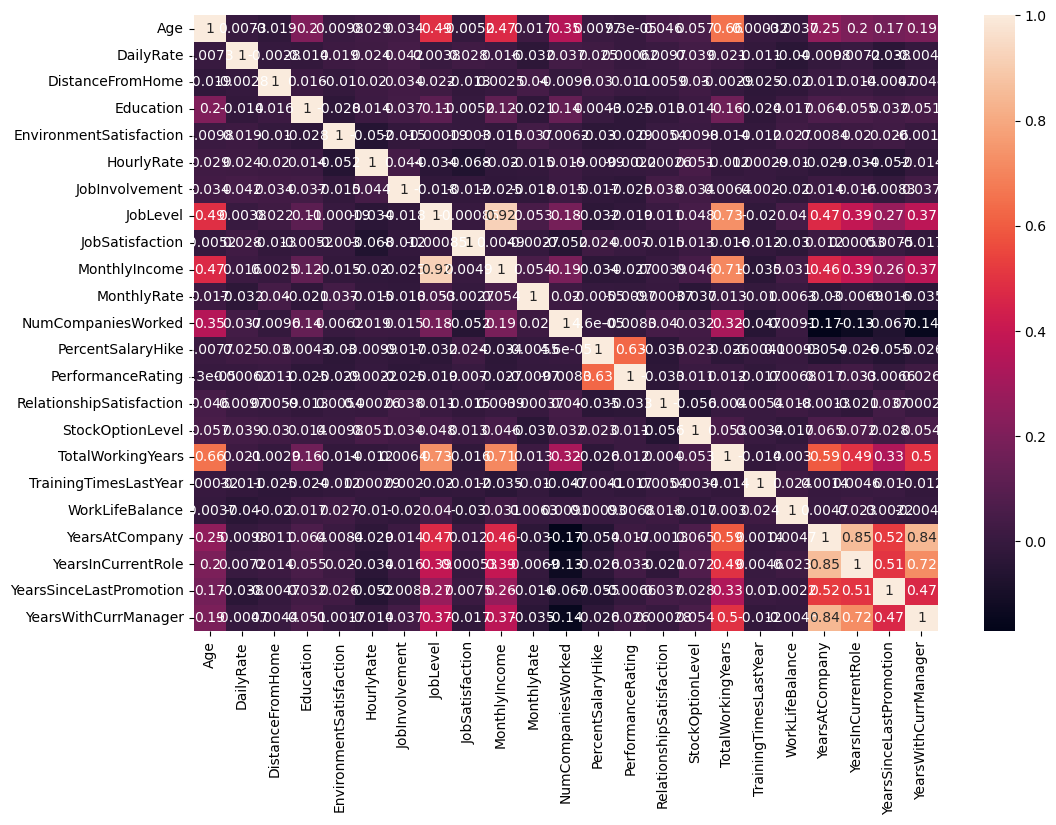

In [407]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)

#### JobLevel and MonthlySalary are highly possitively corelated.
#### YearsInCurrentRole,YearsAtCompany and YearsWithCurrManager are significatly co-related.
#### Age ,MonthlyIncome,TotalWorkingYears are also possitively corelated.


In [408]:
#Convering numeric Age and DistanceFromHome into Bin ranges


df['Distance_range']=pd.cut(df.DistanceFromHome,bins=[1,10,20,30],include_lowest=False)
df["age_range"] = pd.cut(df["Age"],bins=[18,30,50,60],include_lowest=False)

In [409]:
#Creating column with overallsatisfaction

df['overall_satisfaction']=df['RelationshipSatisfaction']+df['EnvironmentSatisfaction']+df['JobSatisfaction']

In [529]:
#Creating a copy of df

df1=df.copy()

In [413]:
df1["OverallSatisfaction"]=df1["RelationshipSatisfaction"]+df1["EnvironmentSatisfaction"]+df1["JobSatisfaction"]

In [414]:
#dropping three satisfaction columns from df1 as there is combined overall satisfaction column
df1=df1.drop(['RelationshipSatisfaction','EnvironmentSatisfaction','JobSatisfaction'],axis=1)

In [ ]:
#Viewing % of attrited 

<AxesSubplot:ylabel='Attrition'>

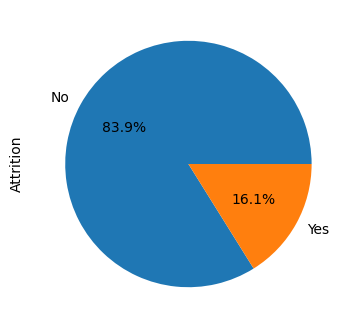

In [445]:
df1.groupby("Attrition")["Attrition"].count().plot.pie(figsize=(4,4),autopct='%1.1f%%')


<AxesSubplot:ylabel='Gender'>

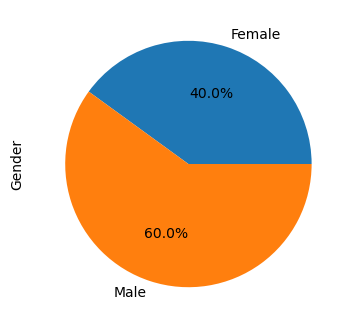

In [446]:
df1.groupby("Gender")["Gender"].count().plot.pie(figsize=(4,4),autopct='%1.1f%%')

<AxesSubplot:xlabel='Gender', ylabel='MonthlyIncome'>

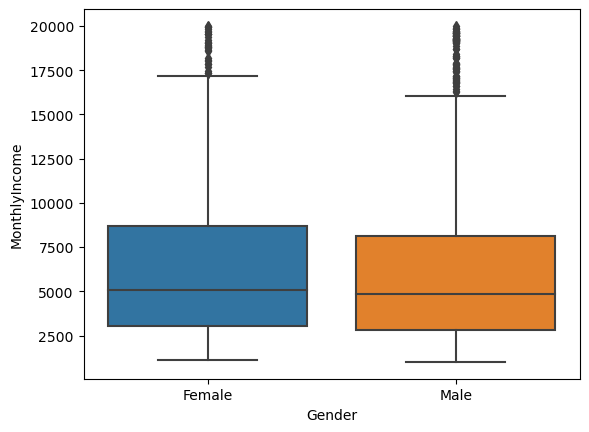

In [447]:
sns.boxplot(x="Gender",y='MonthlyIncome',data=df)

#### From above graphs , Ratio of Female:Male  MonthlyIncome looks fair

In [530]:
#Splitting data into two dataframes with Attrition==Yes/No for easier comparison

df1_Att_Yes=df1[df1["Attrition"]=="Yes"]
df1_Att_No=df1[df1["Attrition"]=="No"]

In [531]:
df1_Att_Yes.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,overall_satisfaction,Attrition_numeric
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0
mean,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,...,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321,7.531646,1.0
std,9.689350,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,...,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349,2.061566,0.0
min,18.000000,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.0
25%,28.000000,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,...,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,6.000000,1.0
50%,32.000000,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,...,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000,8.000000,1.0
75%,39.000000,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,...,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000,9.000000,1.0
max,58.000000,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,...,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000,12.000000,1.0


In [532]:
df1_Att_No.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,overall_satisfaction,Attrition_numeric
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.0
mean,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,...,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397,8.283861,0.0
std,8.888360,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,...,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116,1.824849,0.0
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.0
25%,31.000000,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,...,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,7.000000,0.0
50%,36.000000,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,...,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000,8.000000,0.0
75%,43.000000,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,...,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,10.000000,0.0
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000,12.000000,0.0


In [454]:
#Converting numerical distnace into categorical bins(0-10,10-20,20-30)
df['Distance_range']=pd.cut(df.DistanceFromHome,bins=[1,10,20,30],include_lowest=False)

In [584]:
#Plotting by Distance_range Age
by_DistanceFromHome=df.groupby("Distance_range")["Attrition"].value_counts(normalize=True).to_frame().unstack()

In [621]:
by_DistanceFromHome

Attrition          
Attrition             No       Yes
Distance_range                    
(1, 10]         0.855746  0.144254
(10, 20]        0.800000  0.200000
(20, 30]        0.779412  0.220588

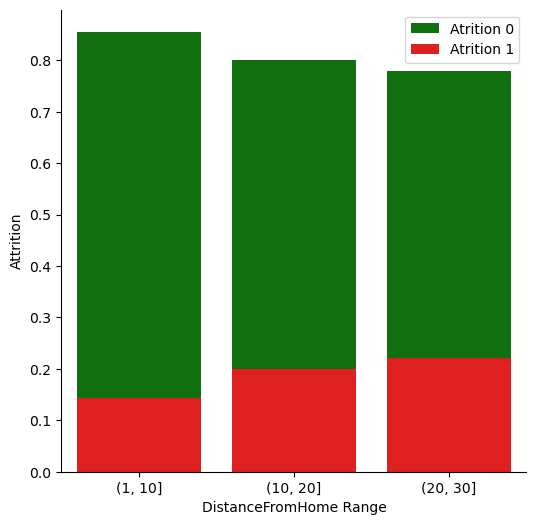

In [592]:
plt.figure(figsize=(6,6))
sns.barplot(x=by_DistanceFromHome.index,y=("Attrition", 'No'),data=by_DistanceFromHome,color="green",label="Atrition 0")
sns.barplot(x=by_DistanceFromHome.index,y=("Attrition", 'Yes'),data=by_DistanceFromHome,color="red",label="Atrition 1")
plt.ylabel('')
plt.ylabel("Attrition")
plt.xlabel("DistanceFromHome Range")
plt.grid(False)
sns.despine()
plt.legend()

#### There is more Attrition among people who are travelling long distance to office.

In [465]:
#Converting Age into categorical bins
df['Age_range']=pd.cut(df.Age,bins=[18,30,50,60],include_lowest=False)

In [466]:
#Plotting by Age range
by_Age_range=df.groupby("Age_range")["Attrition"].value_counts(normalize=True).to_frame().unstack()

In [620]:
by_Age_range

Attrition          
Attrition        No       Yes
Age_range                    
(18, 30]   0.746032  0.253968
(30, 50]   0.873539  0.126461
(50, 60]   0.874126  0.125874

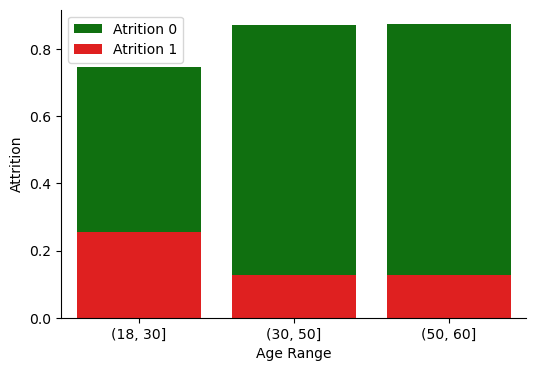

In [593]:
plt.figure(figsize=(6,4))
sns.barplot(x=by_Age_range.index,y=('Attrition', 'No'),data=by_Age_range,color="green",label="Atrition 0")
sns.barplot(x=by_Age_range.index,y=('Attrition', 'Yes'),data=by_Age_range,color="red",label="Atrition 1")
plt.ylabel('')
plt.ylabel("Attrition")
plt.xlabel("Age Range")
plt.grid(False)
sns.despine()
plt.legend()

#### Attrition is  observed more among Younger employees

In [ ]:
# groupby businessTravel
by_bussines =df.groupby("BusinessTravel")["Attrition"].value_counts(normalize=True).to_frame().unstack()

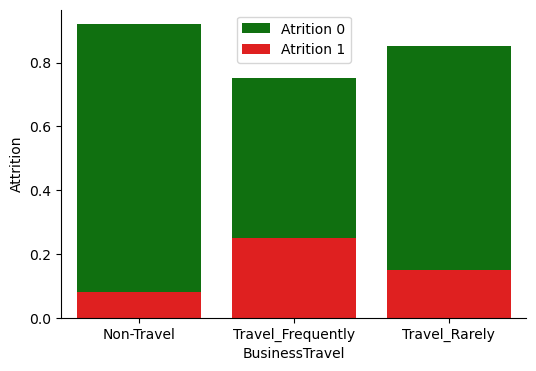

In [594]:
plt.figure(figsize=(6,4))
sns.barplot(x=by_bussines.index,y=('Attrition', 'No'),data=by_bussines,color="green",label="Atrition 0")
sns.barplot(x=by_bussines.index,y=('Attrition', 'Yes'),data=by_bussines,color="red",label="Atrition 1")
plt.ylabel('')
plt.ylabel("Attrition")
plt.xlabel("BusinessTravel")
plt.grid(False)
sns.despine()
plt.legend()

#### Employees who have to travel frequently have more tendency to leave the company as it imposes travel staress and employee has to stay away from family.

In [469]:
# groupby businessTravel
by_Department =df.groupby("Department")["Attrition"].value_counts(normalize=True).to_frame().unstack()

In [471]:
by_Department

Attrition          
Attrition                     No       Yes
Department                                
Human Resources         0.809524  0.190476
Research & Development  0.861602  0.138398
Sales                   0.793722  0.206278

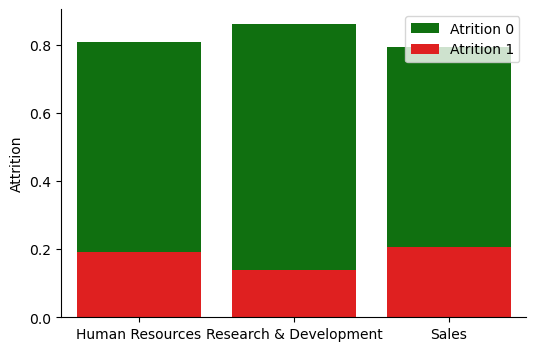

In [470]:
plt.figure(figsize=(6,4))
sns.barplot(x=by_Department.index,y=('Attrition', 'No'),data=by_Department,color="green",label="Atrition 0")
sns.barplot(x=by_Department.index,y=('Attrition', 'Yes'),data=by_Department,color="red",label="Atrition 1")
plt.ylabel('')
plt.ylabel("Attrition")
plt.xlabel("")
plt.grid(False)
sns.despine()
plt.legend()

In [472]:
# groupby businessTravel
by_Jobrole =df.groupby("JobRole")["Attrition"].value_counts(normalize=True).to_frame().unstack()

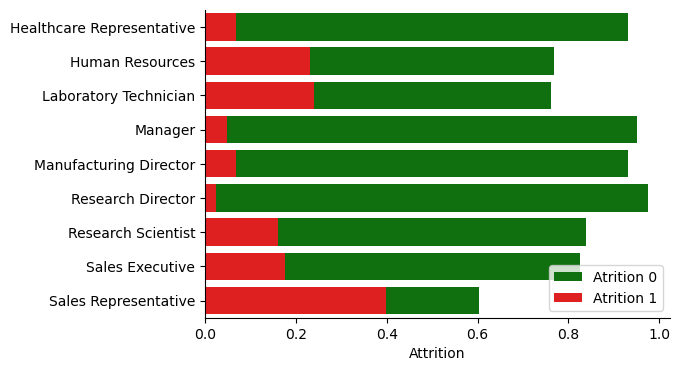

In [477]:
plt.figure(figsize=(6,4))
sns.barplot(y=by_Jobrole.index,x=('Attrition', 'No'),data=by_Jobrole,color="green",label="Atrition 0")
sns.barplot(y=by_Jobrole.index,x=('Attrition', 'Yes'),data=by_Jobrole,color="red",label="Atrition 1")
plt.ylabel("")
plt.xlabel("Attrition")
plt.grid(False)
sns.despine()
plt.legend()


In [478]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Distance_range',
       'age_range', 'overall_satisfaction', 'Age_range'],
      dtype='object')

In [539]:
df.pivot_table('Attrition_numeric',index="JobRole",columns="BusinessTravel")

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
JobRole,,,
Healthcare Representative,0.066667,0.115385,0.055556
Human Resources,0.000000,0.400000,0.210526
Laboratory Technician,0.071429,0.313725,0.244444
Manager,0.083333,0.000000,0.051948
Manufacturing Director,0.000000,0.103448,0.067961
Research Director,0.000000,0.000000,0.032258
Research Scientist,0.142857,0.277778,0.133333
Sales Executive,0.102564,0.220339,0.175439
Sales Representative,0.000000,0.652174,0.327273


In [536]:
df.groupby("JobRole")["MonthlyIncome"].describe()

,count,mean,std,min,25%,50%,75%,max
JobRole,,,,,,,,
Healthcare Representative,131.0,7528.763359,2542.550170,4000.0,5562.00,6811.0,9769.50,13966.0
Human Resources,52.0,4235.750000,2438.849744,1555.0,2340.25,3093.0,5803.50,10725.0
Laboratory Technician,259.0,3237.169884,1150.249802,1102.0,2379.50,2886.0,3880.50,7403.0
Manager,102.0,17181.676471,2317.199822,11244.0,16339.50,17454.5,19129.25,19999.0
Manufacturing Director,145.0,7295.137931,2676.745753,4011.0,5070.00,6447.0,9526.00,13973.0
Research Director,80.0,16033.550000,2827.621369,11031.0,13490.25,16510.0,18814.50,19973.0
Research Scientist,292.0,3239.972603,1198.116113,1009.0,2386.00,2887.5,3902.50,9724.0
Sales Executive,326.0,6924.279141,2366.943019,4001.0,5025.25,6231.0,8538.75,13872.0
Sales Representative,83.0,2626.000000,854.534419,1052.0,2250.00,2579.0,2878.50,6632.0


#### There are many who travel frequently in sales Representatives
#### Also the mean MonthlyIncome of SalesRepresentative is much lower than the other roles.
#### Hence Many employees there is high Attrition in this department.

In [298]:
#Creating object list
category_list=['BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus','OverTime']

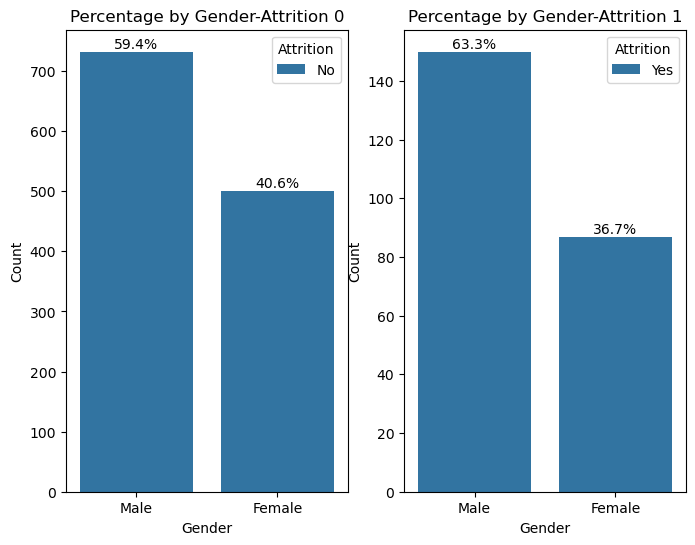

In [567]:
fig=plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df1_Att_No, x="Gender", hue="Attrition",order=["Male","Female"])
ax.set(ylabel='Count', title='Percentage by Gender-Attrition 0')
for c in ax.containers:
    labels = [f'{(v.get_height())/df1_Att_No.Gender.count()*100:0.1f}%' if ( v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')


plt.subplot(1,2,2)
ax=sns.countplot(data=df1_Att_Yes, x="Gender", hue="Attrition",order=["Male","Female"])
ax.set(ylabel='Count', title='Percentage by Gender-Attrition 1')
for c in ax.containers:
    labels = [f'{(v.get_height())/df1_Att_Yes.Gender.count()*100:0.1f}%' if ( v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

#### Relative proportion of female employees leaving company is more than Male

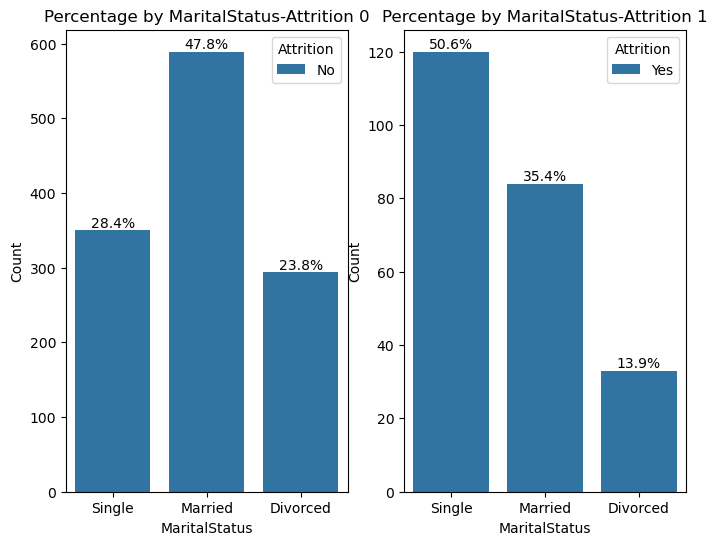

In [569]:
#for i,column in enumerate(['BusinessTravel', 'Department', 'EducationField', 'Gender',       'JobRole', 'MaritalStatus','OverTime']):
fig=plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df1_Att_No, x="MaritalStatus", hue="Attrition",order=["Single","Married","Divorced"])
ax.set(ylabel='Count', title='Percentage by MaritalStatus-Attrition 0')
for c in ax.containers:
    labels = [f'{(v.get_height())/df1_Att_No.MaritalStatus.count()*100:0.1f}%' if ( v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')


plt.subplot(1,2,2)
ax=sns.countplot(data=df1_Att_Yes, x="MaritalStatus", hue="Attrition",order=["Single","Married","Divorced"])
ax.set(ylabel='Count', title='Percentage by MaritalStatus-Attrition 1')
for c in ax.containers:
    labels = [f'{(v.get_height())/df1_Att_Yes.MaritalStatus.count()*100:0.1f}%' if ( v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

#### Employees who are Single have higher attrition proportion comparted to Married and Divorced employees

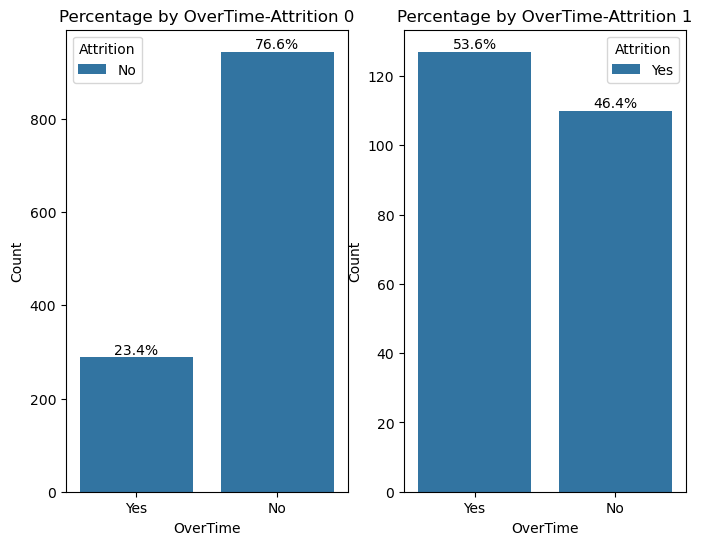

In [571]:
fig=plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df1_Att_No, x="OverTime", hue="Attrition",order=["Yes","No"])
ax.set(ylabel='Count', title='Percentage by OverTime-Attrition 0')
for c in ax.containers:
    labels = [f'{(v.get_height())/df1_Att_No.OverTime.count()*100:0.1f}%' if ( v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')


plt.subplot(1,2,2)
ax=sns.countplot(data=df1_Att_Yes, x="OverTime", hue="Attrition",order=["Yes","No"])
ax.set(ylabel='Count', title='Percentage by OverTime-Attrition 1')
for c in ax.containers:
    labels = [f'{(v.get_height())/df1_Att_Yes.OverTime.count()*100:0.1f}%' if ( v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

#### Proportion of Employees who are not working overtime are staying in the company.

In [603]:
satisfied_unique_rating=df1.overall_satisfaction.sort_values().unique()

In [617]:
satisfied_unique_rating

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Text(0.5, 1.0, 'Attrition_1')

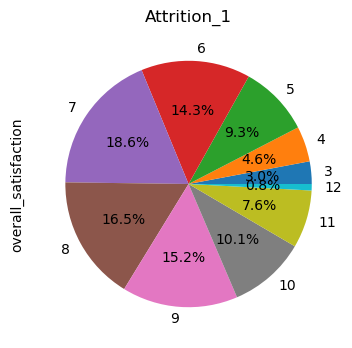

In [618]:
df1_Att_Yes.groupby("overall_satisfaction")["overall_satisfaction"].count().plot.pie(figsize=(4,4),autopct='%1.1f%%')
plt.title("Attrition_1")

Text(0.5, 1.0, 'Attrition_0')

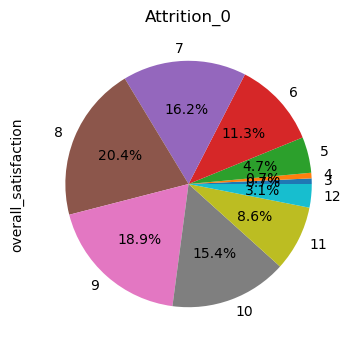

In [616]:
df1_Att_No.groupby("overall_satisfaction")["overall_satisfaction"].count().plot.pie(figsize=(4,4),autopct='%1.1f%%')
plt.title("Attrition_0")

#### There is not much to be derived from Overall satisfaction ratings

[Text(0.5, 1.0, 'Bar count for total')]

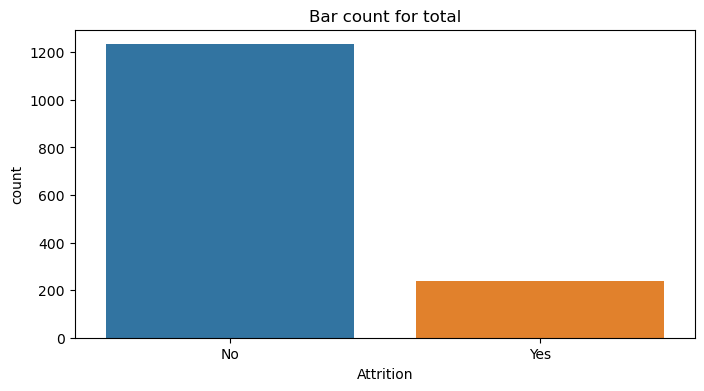

In [614]:
plt.figure(figsize=(8,4))
sns.countplot(x="Attrition",data=df1,order=["No","Yes"]).set(title='Bar count for total')

### Can be observed that it is an imbalanecd dataset,so before building model data needs to be balanced.